<a href="https://colab.research.google.com/github/Riturajkumari/Machine_learning/blob/main/ordinal_encodeing%2C_label_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you
might choose one over the other.**

-  Ordinal encoding should be used for ordinal variables. 
- An Ordinal scale is a variable in which the value of the data is captured from an ordered set. For example, customer feedback survey data



- In label encoding in Python, we replace the categorical value with a numeric value between 0 and the number of classes minus 1.

- Label encoding should be used for non-ordinal  variables 
- LabelEncoder class using scikit-learn library 
Category codes

In [1]:
# load dataset
# example of label encoding
import seaborn as sns
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['species']= label_encoder.fit_transform(df['species'])

df['species'].unique()


array([0, 1, 2])

In [3]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

[['red']
 ['green']
 ['blue']]
[[2.]
 [1.]
 [0.]]


**Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in
a machine learning project.**

In [4]:
import pandas as pd
# create a table 
df= pd.DataFrame({
    'city':['New york','London','Paris','Tokyo','New york','Paris'],
    'price':[200,150,300,250,180,320]
    
})

In [5]:
df.head()

,city,price
0,New york,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New york,180


In [6]:
# calculate the mean price for each city
mean_price= df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 150.0, 'New york': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [7]:
# replace each city with its mean price
df['city_encoded']=df['city'].map(mean_price)

In [8]:
df

,city,price,city_encoded
0,New york,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New york,180,190.0
5,Paris,320,310.0


**Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?**

- Covariance measures the total variation of two random variables from their expected values. Using covariance, we can only gauge the direction of the relationship (whether the variables tend to move in tandem or show an inverse relationship). However, it does not indicate the strength of the relationship, nor the dependency between the variables.
-  correlation measures the strength of the relationship between variables. Correlation is the scaled measure of covariance. 

In [9]:
import seaborn as sns
df= sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
# row and col
df.shape

(891, 15)

In [11]:
# correlation value varies between -1 and 1
# correlation value between -1 and -0.5 signifies high negative correlation or inverse relationship
# correlation value between -0.5 and 0.5 signifies no correlation
# correlation value between 0.5 and 1 signifies high positive correlation or proportional relationship
# correlation value between -1 and -0.8 signifies high negative correlation or inverse relationship
# correlation value between -0.8 and 0.8 signifies no correlation
# correlation value between 0.8 and 1 signifies high positive correlation or proportional relationship
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<Axes: >

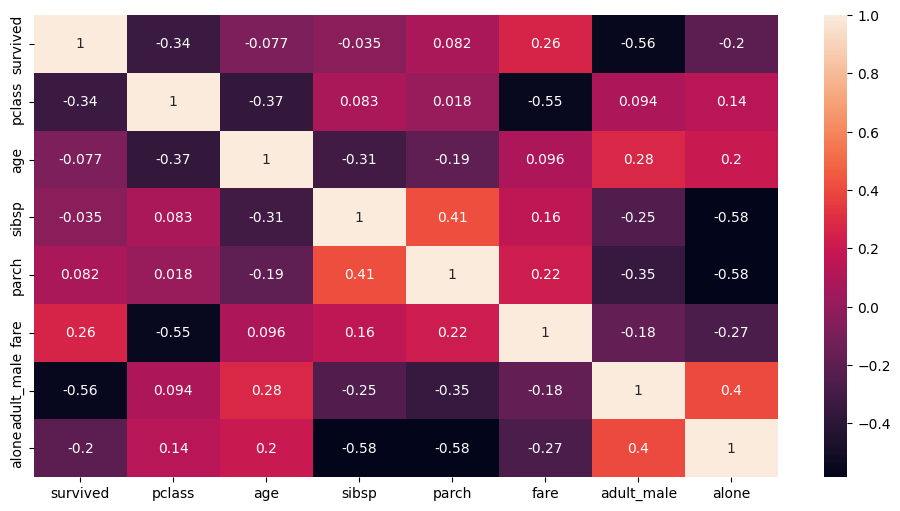

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

**Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium,
large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library.
Show your code and explain the output.**

In [13]:
import pandas as pd
df = pd.DataFrame({
    'color':['red','green','blue'],
    'size':['small','medium','large'],
    'material':['wood','medium','large']
})

In [14]:
df

,color,size,material
0,red,small,wood
1,green,medium,medium
2,blue,large,large


In [15]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'color'.
df['color']= label_encoder.fit_transform(df[['color']])

df['color'].unique()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 1, 0])

In [16]:


# Encode labels in column 'size'.
df['size']= label_encoder.fit_transform(df['size'])

df['size'].unique()


array([2, 1, 0])

In [17]:


# Encode labels in column 'species'.
df['material']= label_encoder.fit_transform(df['material'])

df['material'].unique()


array([2, 1, 0])

**Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education
level. Interpret the results.**

In [18]:
import pandas as pd
df = pd.DataFrame({
    'Age':[23,34,40,45,50],
    'income':[23000,35000,40000,45000,50000],
    'education':['ba','bsc','b.com','B.tech','M.tech']
})
df

,Age,income,education
0,23,23000,ba
1,34,35000,bsc
2,40,40000,b.com
3,45,45000,B.tech
4,50,50000,M.tech


In [19]:
# covarieance
df.cov()

,Age,income
Age,109.3,108200.0
income,108200.0,107300000.0


**Q6. You are working on a machine learning project with a dataset containing several categorical
variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD),
and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for
each variable, and why?**

In [20]:
# load dataset
import pandas as pd
df= pd.DataFrame({
    'gender':['male','female','male','female'],
    'Education':['high school','bachelor','master','phd'],
    'employment status':['unemployed','part-time','full-time','full-time']
})

In [21]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['gender']= label_encoder.fit_transform(df['gender'])

df['gender'].unique()


array([1, 0])

In [22]:
# Encode labels in column 'species'.
df['Education']= label_encoder.fit_transform(df['Education'])

df['Education'].unique()

array([1, 0, 2, 3])

In [23]:
# Encode labels in column 'species'.
df['employment status']= label_encoder.fit_transform(df['employment status'])

df['employment status'].unique()

array([2, 1, 0])

**Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two
categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/
East/West). Calculate the covariance between each pair of variables and interpret the results.**

In [31]:
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [34]:
df= pd.DataFrame({
    'temp':['hot','mild','cool','hot','cool'],
    'humidity':['high','normal','normal','high','normal'],
    'weather':['sunny','sunny','overcast','overcast','rain'],
    'wind':['north','south','east','west','north']
})
df

,temp,humidity,weather,wind
0,hot,high,sunny,north
1,mild,normal,sunny,south
2,cool,normal,overcast,east
3,hot,high,overcast,west
4,cool,normal,rain,north


In [35]:
# getting categorical and numerical columns
cat_cols = df.select_dtypes(exclude='number').columns.to_list()
num_cols = df.select_dtypes(include='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['temp', 'humidity', 'weather', 'wind']
Numerical Columns:  []


In [36]:
for col in ['temp', 'humidity', 'weather', 'wind']:
  vals = df[col].unique()
  print(f'Unique values/classes in {col} are {vals}\n' )
 

Unique values/classes in temp are ['hot' 'mild' 'cool']

Unique values/classes in humidity are ['high' 'normal']

Unique values/classes in weather are ['sunny' 'overcast' 'rain']

Unique values/classes in wind are ['north' 'south' 'east' 'west']



In [37]:
# Unique values for categorical columns
for col in cat_cols:
  print('Series: ', col)
  vals = df[col].value_counts()
  print(f'Unique values/classes in {col} are : {vals}' )
  print('\n')

Series:  temp
Unique values/classes in temp are : hot     2
cool    2
mild    1
Name: temp, dtype: int64


Series:  humidity
Unique values/classes in humidity are : normal    3
high      2
Name: humidity, dtype: int64


Series:  weather
Unique values/classes in weather are : sunny       2
overcast    2
rain        1
Name: weather, dtype: int64


Series:  wind
Unique values/classes in wind are : north    2
south    1
east     1
west     1
Name: wind, dtype: int64




In [38]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [40]:
df['temp']= encoder.fit_transform(df['temp'])
df['temp']

0    1
1    2
2    0
3    1
4    0
Name: temp, dtype: int64

In [41]:
df['wind']= encoder.fit_transform(df['wind'])
df['wind']

0    1
1    2
2    0
3    3
4    1
Name: wind, dtype: int64

In [42]:
df['humidity']= encoder.fit_transform(df['humidity'])
df['humidity']

0    0
1    1
2    1
3    0
4    1
Name: humidity, dtype: int64

In [43]:
df['weather']= encoder.fit_transform(df['weather'])
df['weather']

0    2
1    2
2    0
3    0
4    1
Name: weather, dtype: int64

In [44]:
df

,temp,humidity,weather,wind
0,1,0,2,1
1,2,1,2,2
2,0,1,0,0
3,1,0,0,3
4,0,1,1,1
